INTRODUCTION: 

This dataset examines factors related to sleeping disorders such as insomnia and sleep apnea. It includes columns for sleep duration, sleep quality, stress level, age, heart rate, physical activity level, and more. These factors help determine whether individuals surveyed have no sleep disorder, insomnia, or sleep apnea. Insomnia refers to difficulties falling or staying asleep, leading to insufficient or poor-quality sleep. Sleep apnea involves breathing pauses during sleep, leading to disrupted sleep patterns and potential health risks.


The question we will be answering is based on our personal data, does a sleep disorder persist and if so which one? This is an important question for us to explore as we could possible identify and work towards finding a diagnosis for ourselves. This could lead to lifestyle changes that would give us an overall better quailty of life.




In [1]:
### Loading necessary libraries needed to tidy and wrangle our dataset. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

PRELIMINARY EXPLORATORY DATA ANALYSIS:

In [2]:
## Reading dataset into R
sleep <- read_csv("https://raw.githubusercontent.com/mikkielynn/DSCI_100_project/main/Sleep_health_and_lifestyle_dataset.csv")
head(sleep)

Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


In [3]:
# Tidying our dataset: Renaming variable names to make the data easier to work with and apply functions to for manipulation. 
colnames(sleep) <- c("Person_ID", "Gender", "Age", "Occupation", "Sleep_Duration", "Quality_of_sleep", "Physical_Activity_Level", "Stress_Level", "BMI", "Blood_Pressure", "Heart_Rate", "Daily_steps", "Sleep_disorder")
sleep

Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_sleep,Physical_Activity_Level,Stress_Level,BMI,Blood_Pressure,Heart_Rate,Daily_steps,Sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
# Tidied data; selected columns used for analysis
sleep_2 <- sleep |>
    select(-Person_ID, -Gender, -Occupation, -BMI, -Blood_Pressure) |>
    mutate(Sleep_disorder = as.factor(Sleep_disorder))
sleep_2

Age,Sleep_Duration,Quality_of_sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_steps,Sleep_disorder
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
27,6.1,6,42,6,77,4200,None
28,6.2,6,60,8,75,10000,None
28,6.2,6,60,8,75,10000,None
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,8.1,9,75,3,68,7000,Sleep Apnea
59,8.1,9,75,3,68,7000,Sleep Apnea
59,8.1,9,75,3,68,7000,Sleep Apnea


- PERFORMING SUMMARY STATISTICS ON OUR TRAINING DATA:

In [5]:
#splitting our data into a testing set and a training set
sleep_split <- initial_split(sleep_2, prop = 0.5, strata = Sleep_disorder)
sleep_train <- training(sleep_split)
sleep_test <- testing(sleep_split)
sleep_train     
sleep_test

#ensuring we have equal proportions of the different lables for the sleep disorder
sleep_train |>
    count(Sleep_disorder)

sleep_test |>
    count(Sleep_disorder)

Age,Sleep_Duration,Quality_of_sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_steps,Sleep_disorder
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
29,6.5,5,40,7,80,4000,Insomnia
39,7.2,8,60,5,68,8000,Insomnia
39,6.5,5,40,7,80,4000,Insomnia
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,8.1,9,75,3,68,7000,Sleep Apnea
59,8.0,9,75,3,68,7000,Sleep Apnea
59,8.1,9,75,3,68,7000,Sleep Apnea


Age,Sleep_Duration,Quality_of_sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_steps,Sleep_disorder
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,6.2,6,60,8,75,10000,None
28,6.2,6,60,8,75,10000,None
28,5.9,4,30,8,85,3000,Insomnia
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,8.1,9,75,3,68,7000,Sleep Apnea
59,8.1,9,75,3,68,7000,Sleep Apnea
59,8.1,9,75,3,68,7000,Sleep Apnea


Sleep_disorder,n
<fct>,<int>
Insomnia,38
None,109
Sleep Apnea,39


Sleep_disorder,n
<fct>,<int>
Insomnia,39
None,110
Sleep Apnea,39


In [6]:
#calculating the percentge of each sleep disorder in our training data to give us an overview of the data we are working with
num_obs <- nrow(sleep_2)
sleep_train |>
  group_by(Sleep_disorder) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )

Sleep_disorder,count,percentage
<fct>,<int>,<dbl>
Insomnia,38,10.16043
None,109,29.14439
Sleep Apnea,39,10.42781


In [7]:
# Summarizing means across quantitative variables for our training data
sleep_summary <- sleep_train |>
    summarize(across(Age:Daily_steps, mean))
sleep_summary

Age,Sleep_Duration,Quality_of_sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_steps
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41.84409,7.130108,7.344086,59.75269,5.38172,70.25806,6761.828


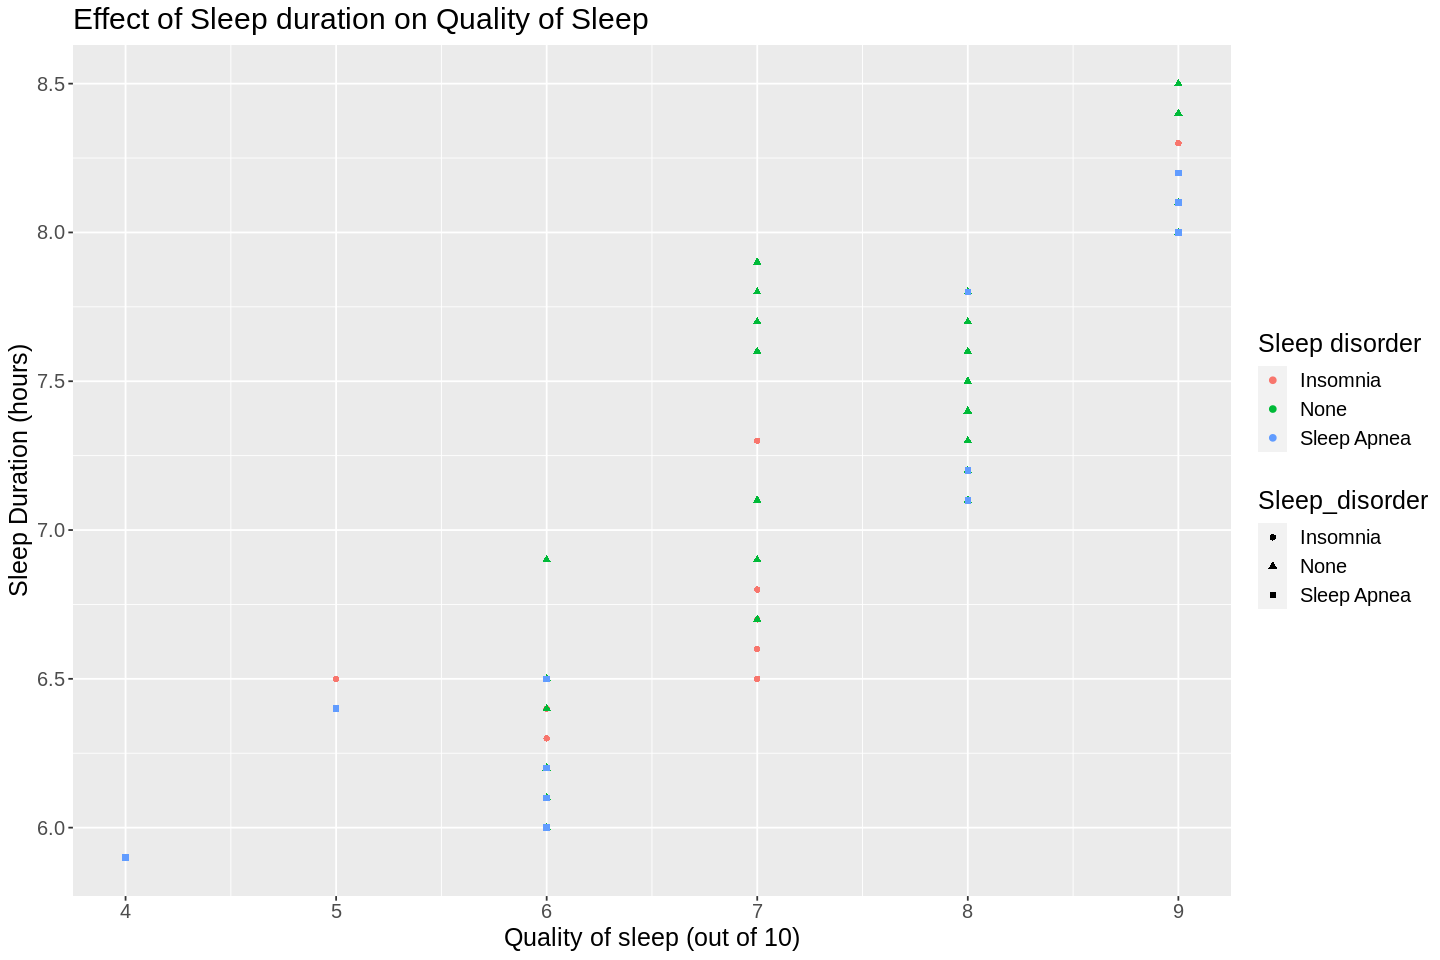

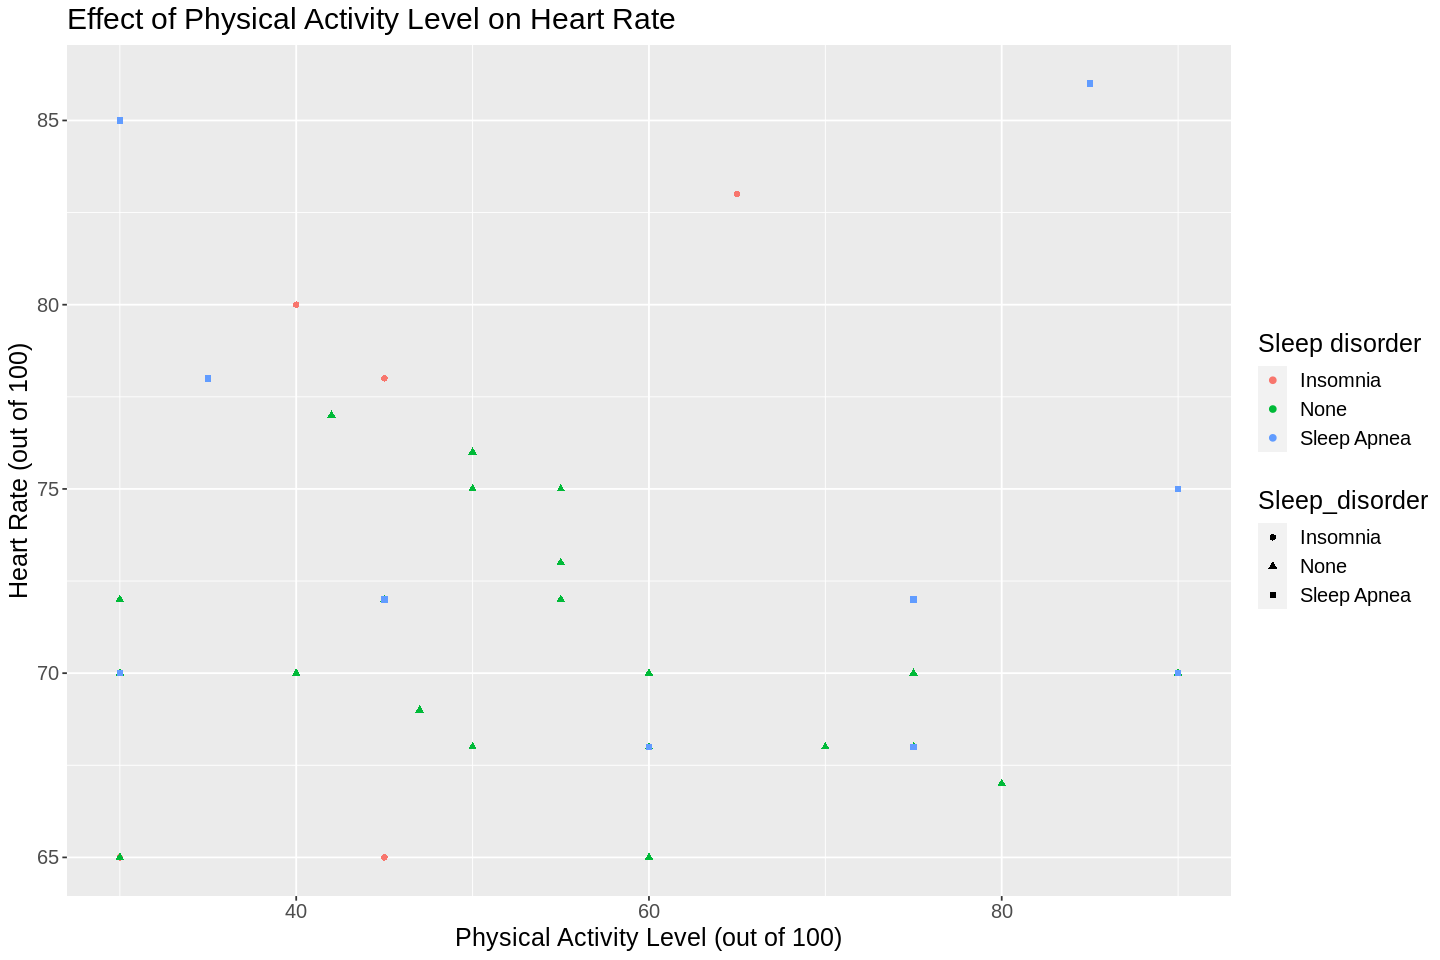

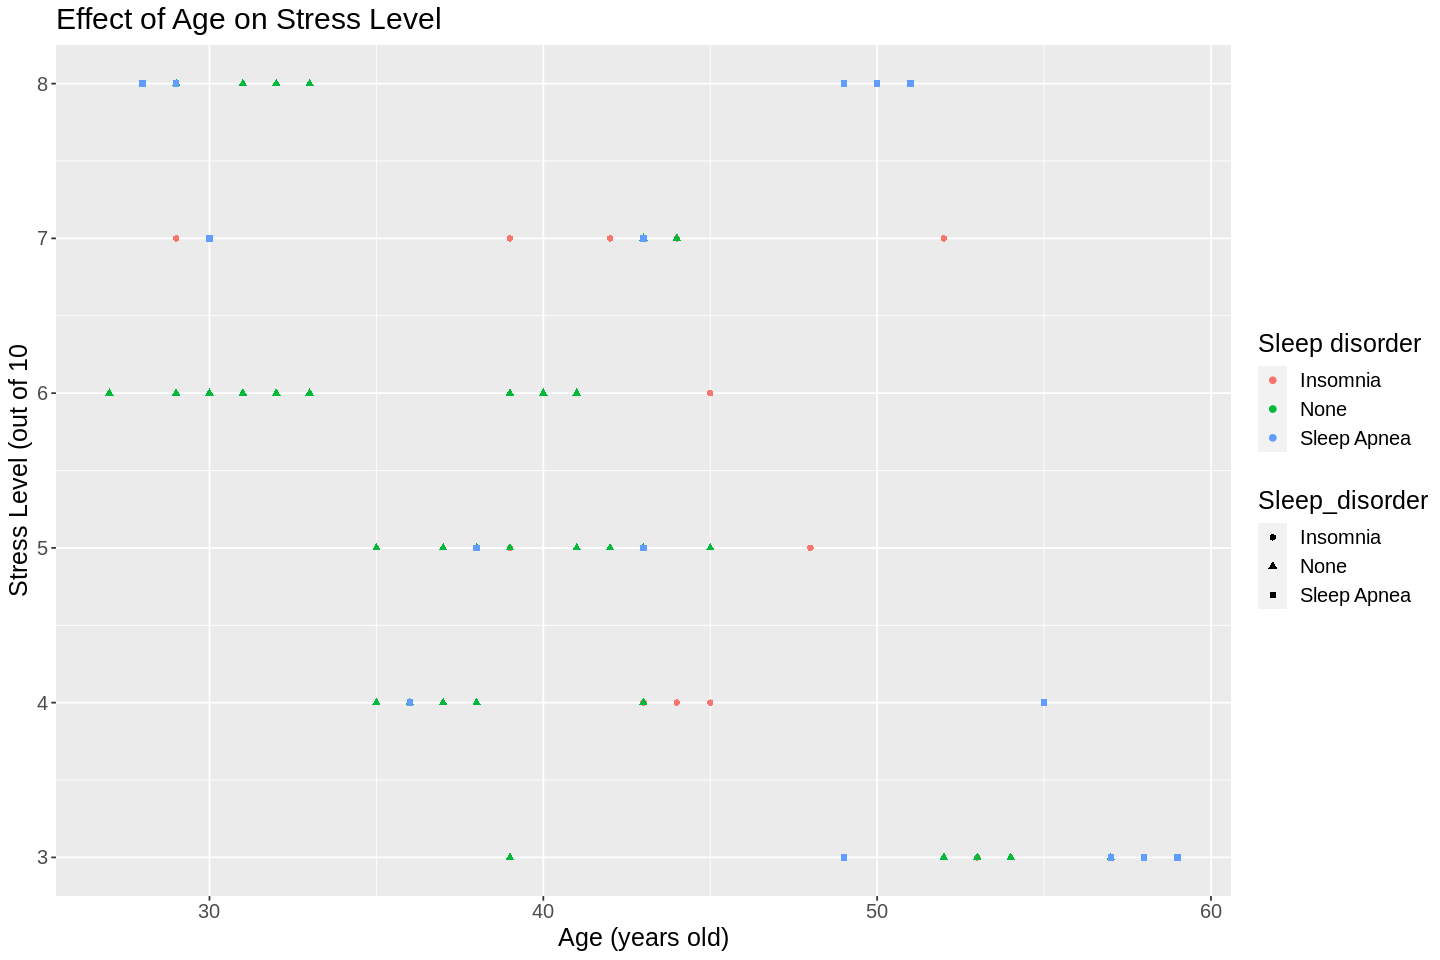

In [8]:
options(repr.plot.width = 12, repr.plot.height = 8)

sleep_quality_duration <- sleep_train |> 
    ggplot(aes(x = Quality_of_sleep, y = Sleep_Duration, colour = Sleep_disorder, shape = Sleep_disorder)) +
        geom_point() + 
        labs(x = "Quality of sleep (out of 10)",
             y = "Sleep Duration (hours)", 
             colour = "Sleep disorder", 
             title = "Effect of Sleep duration on Quality of Sleep") +
        theme(text = element_text(size = 15))
        
sleep_quality_duration

sleep_heart_exercise <- sleep_train |> 
    ggplot(aes(x = Physical_Activity_Level, y = Heart_Rate, colour = Sleep_disorder, shape = Sleep_disorder)) +
        geom_point() + 
        labs(x = "Physical Activity Level (out of 100)",
             y = "Heart Rate (out of 100)", 
             colour = "Sleep disorder", 
             title = "Effect of Physical Activity Level on Heart Rate") +
        theme(text = element_text(size = 15))

sleep_heart_exercise

options(repr.plot.width = 12, repr.plot.height = 8)

sleep_age_stress <- sleep_train |> 
    ggplot(aes(x = Age, y = Stress_Level, colour = Sleep_disorder, shape = Sleep_disorder)) +
        geom_point() + 
        labs(x = "Age (years old)",
             y = "Stress Level (out of 10", 
             colour = "Sleep disorder", 
             title = "Effect of Age on Stress Level") +
        theme(text = element_text(size = 15))

sleep_age_stress

METHODS:  
    
**note graphs were based off of training data which is 50% of the entire dataset.

We will be using the K-nearest neighbour algorithm to analyze our data by first standardizing all variables using both bake() and recipe(). Afterwards, we will split the dataset into a testing and training subset and perform cross-validation on the training set to determine the best K for our model. After testing our model for accuracy we will then input the new data points to determine whether a sleep disorder persists based on our personal data, and if so which one?

From the original dataset, we decided to research six variables from the sleep_2 dataset. First was the effects of heart health and exercise. Exercise plays the role of a beta blocker, which blocks the release of the hormone epinephrine. This slows the heart rate and lowers blood pressure, which reduces one’s chances of going into cardiac arrest. Younger age groups, including young adults, experience higher stress levels compared to older age groups. Factors such as pre-existing anxiety, disruptions in education and social interactions, and higher unemployment rates contribute to their stress. Older adults generally perceive events as less stressful due to better emotional regulation and previous crisis experiences.

Aside from the cardiovascular system, we also researched the impact of one's sleep patterns on developing a sleep disorder. REM (rapid eye movement) is crucial to harness cognitive functions like memory consolidation, and studies show that longer durations and higher quality of sleep increases this REM period. This can be seen from the plot above, as those with over seven hours of sleep and better quality (above seven) were not classified to have insomnia. 

From the research, we decided that an individual's sleep habits/patterns has the greatest influence on developing a sleeping disorder. Therefore quality of sleep and sleep duration will be the two variables we focus on for the remaining analysis.

Here we perform cross-validation with v = 5 to determine the best k value to use for our classification model. Using a sequence of 1 to 10 by one unit, we can determine which neighbor value generates the best prediction accuracy and use the determined value to use our model on the sleep testing data set. 

In [9]:
# cross validation with 5 vfold
sleep_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("classification") 

sleep_recipe <- recipe(Sleep_disorder ~ Sleep_Duration + Quality_of_sleep, data = sleep_train) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

sleep_vfold <- vfold_cv(sleep_train, v = 5, strata = Sleep_disorder)

# testing model on sleep training set with k = 1 to 10
gridvals <- tibble(neighbors = 1:10)
sleep_results <- workflow() |> 
    add_recipe(sleep_recipe) |> 
    add_model(sleep_spec) |>
    tune_grid(resamples = sleep_vfold, grid = gridvals) |> 
    collect_metrics() |>
    filter(.metric == "accuracy") |>
    arrange(desc(mean)) |>
    slice(1)
sleep_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,accuracy,multiclass,0.8005405,5,0.02831113,Preprocessor1_Model05


From this cross-validation, we can conclude that the most accurate number of neighbors to be used in our analysis is 7, with an accuracy of 0.817, that is calculated through testing the subtrain model on the validation set within our training data. We can now use this calculated value of k and apply it to our model to use against our testing set and predict our new personal data.

In [10]:
# pulling the best k value
k_value <- sleep_results |>
    pull(neighbors)

# retrain on entire sleep training set
new_sleep_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_value) |>
      set_engine("kknn") |>
      set_mode("classification") 

new_sleep_fit <- workflow() |>
    add_recipe(sleep_recipe) |>
    add_model(new_sleep_spec) |>
    fit(data = sleep_train)

In [11]:
# determining model prediction accuracy
sleep_prediction_accuracy <- predict(new_sleep_fit, sleep_test) |>
    bind_cols(sleep_test) |>
    metrics(truth = Sleep_disorder, estimate = .pred_class) |>
    slice(1) |>
    pull(.estimate)
sleep_prediction_accuracy

[1] 0.8031915

Measured against the testing set, our model has a prediction accuracy value of about 0.8, where the testing data was used as unfamiliar data to generate classification labels using the model which can then be compared to the actual true labels.

In [12]:
# binding the new observation to our sleep_2 dataset
personal_1 <- data.frame(20, 6.5, 6.5, 30, 9, 90, 3500, "")
names(personal_1) <- c("Age", 
                       "Sleep_Duration", 
                       "Quality_of_sleep",
                       "Physical_Activity_Level",
                       "Stress_Level",
                       "Heart_Rate",
                       "Daily_steps",
                       "Sleep_disorder")
sleep_final <- rbind(sleep_2, personal_1)

# predict sleep disorder based on new observation
personal_prediction <- predict(new_sleep_fit, personal_1)
personal_prediction

.pred_class
<fct>
Insomnia


Now, using data collected from our own, personal lives, we were able to use the model which classified that we have an Insomnia sleeping disorder. However, keeping the prediction accuracy of 0.8 in mind, we should take this label with some reasonable doubt and not solely rely on this model for an accurate diagnosis.

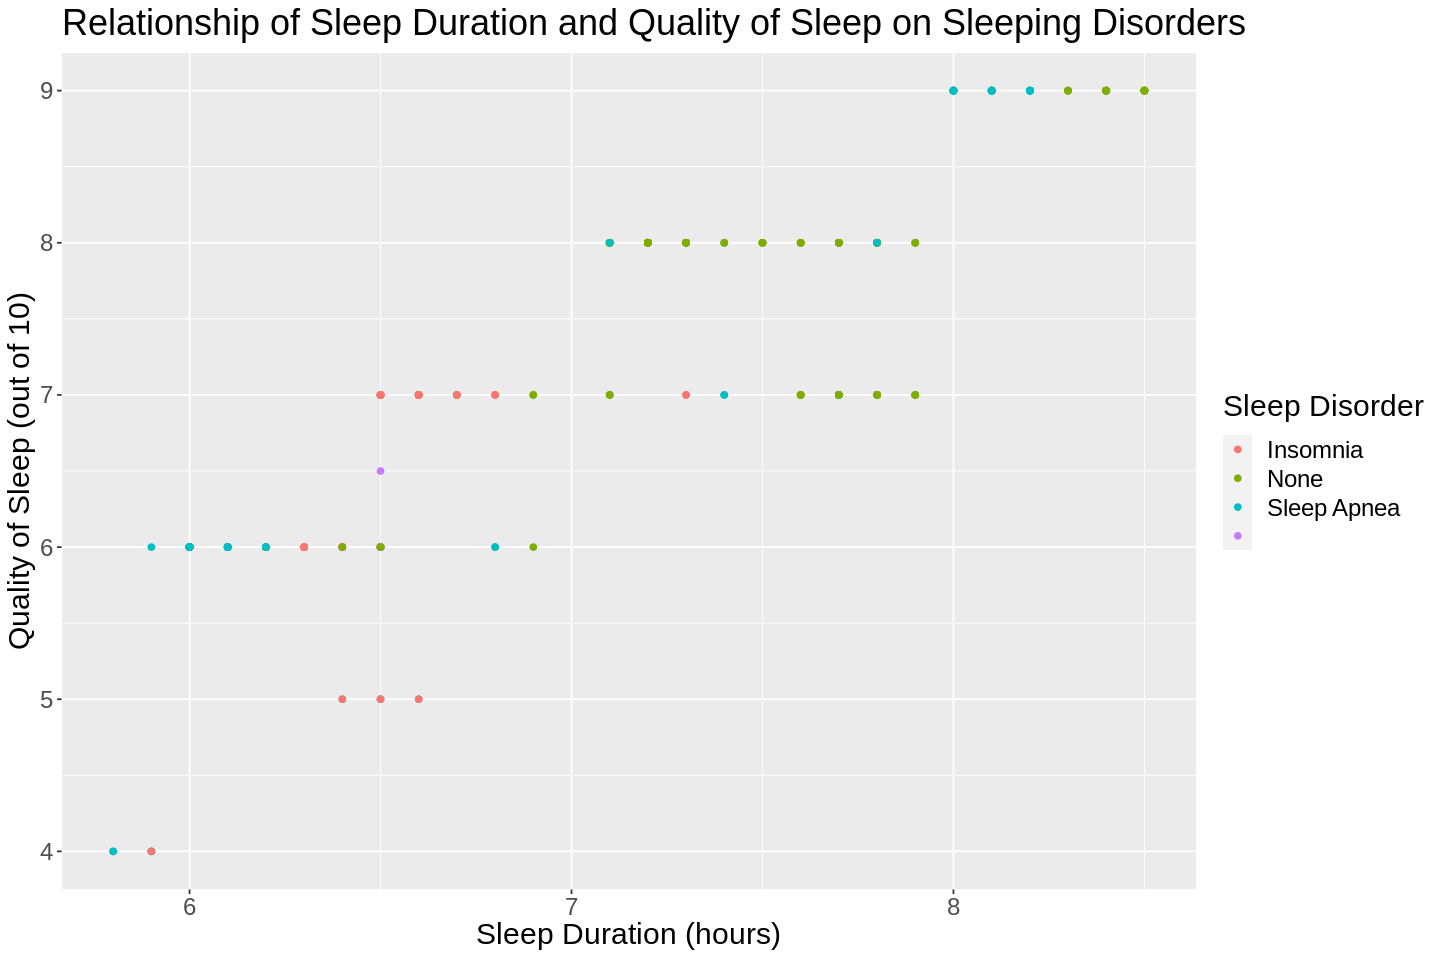

In [13]:
# plotting the new prediction with final_sleep data set
options(repr.plot.width = 12, repr.plot.height = 8)
personal_plot <- sleep_final |>
    ggplot(aes(x = Sleep_Duration, y = Quality_of_sleep, color = Sleep_disorder)) +
    geom_point() +
    labs(x = "Sleep Duration (hours)", y = "Quality of Sleep (out of 10)", color = "Sleep Disorder") +
    ggtitle("Relationship of Sleep Duration and Quality of Sleep on Sleeping Disorders") +
    theme(text = element_text(size = 18))
personal_plot

EXPECTED OUTCOMES AND SIGNIFICANCE:

In the analysis, we anticipate uncovering patterns and trends related to sleep disorders. The dataset includes diagnosis of sleep apnea, insomnia, and no sleep disorder. Our training data indicates that most of the sampled population has no sleep disorder. However, we expect by delving deeper into the data, we will be able to further distinguish the difference between insomnia and sleep apnea and they can be accurately and more effectively diagnosed. 

Furthermore, our initial expectations revolve around identifying trends in sleep disorders and understanding how each disorder uniquely impacts different aspects of an individual's sleep. Existing studies highlight how the duration of sleep obtained each night significantly affects a person’s quality of sleep, serving as a useful predictor for distinguishing between various sleeping disorders that persist. Though, further research must be conducted to determine the extent to which other factors, and if other factors, contribute to the occurrence of these sleeping disorders. 

The impact of the findings can be substantial and far-reaching. By continuing to re-train the model, and include more predictors, the resulting findings can greatly benefit medical professionals in their efforts to diagnose and treat sleep disorders. This model provides a simple means of classifying new patients into a respective sleeping disorder based on various predictors which can be modified to a medical professional’s convenience. Using this model, health care professionals can provide sleep-disorder-specific treatment to a patient, ensuring efficient recovery instead of a lengthy diagnosis. In addition to this, the model can provide an enhanced understanding of the role of different aspects of sleep in overall human sleep health. Predictors, such as the two we evaluated, sleep duration and quality of sleep, can have profound implications on our health and may result in the researched sleep disorders. This information can provide researchers, doctors, and healthcare professionals between different factors of sleep on the overall human well-being, which can be used to develop strategies for optimizing sleep and moreover, the findings contribute to the broader society’s understanding of sleep and its importance in human health. It is by understanding the connections that sleep duration plays in shaping sleep quality that offers an insight to the mechanisms of our sleep cycle. 

The findings of our model lead to several avenues for future research that one may pursue regarding sleeping disorders, specifically insomnia and sleep apnea. For instance, one may find value in investigating whether specific age groups or populations are more susceptible to sleep disorders related to sleep duration. Understanding which populations are most vulnerable can help adapt and modify preventive measures accordingly. In addition, exploring the long-term health consequences of consistently inadequate or excessive sleep duration would be beneficial in highlighting the importance and role of sleep for humans and drawing light to the importance of sleep. Lastly, the complex, multifaceted nature of these conditions must be considered, especially if investigating new, potential factors. For instance, could sleeping disorders be genetically pre-dispositioned? This research would allow potential genetic markers and early indications to be discovered which can help in diagnosis and effective treatment.

In [14]:
References: 

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: References: 
   ^
